In [93]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [94]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [95]:
#feature names are given in a dictionary format in the dataset as independent variables
#target column is given as an dependent variable.
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target, columns =['price'])

In [96]:
#Dataset preparation
dataframe=pd.concat([df_x, df_y], axis=1)

In [97]:
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [98]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [99]:
#check for the missing values
dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [100]:
#check for the stats/percentile
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [101]:
#EDA
#Check for correlation
dataframe.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Price')

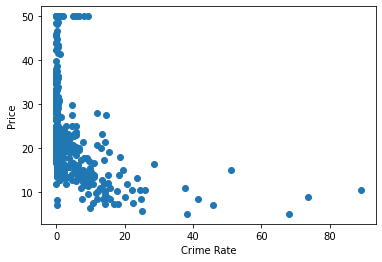

In [102]:
#check for correlation graphically
import seaborn as sns
plt.scatter(dataframe['CRIM'],dataframe['price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')
#Graph shows price is inversely correlated to crime rate.

<AxesSubplot:xlabel='CRIM', ylabel='price'>

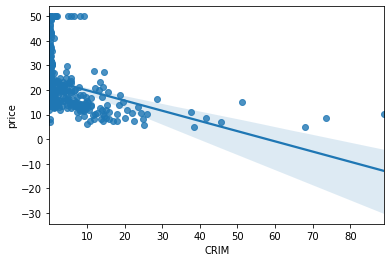

In [103]:
sns.regplot(x="CRIM",y="price", data=dataframe)

Text(0, 0.5, 'Price')

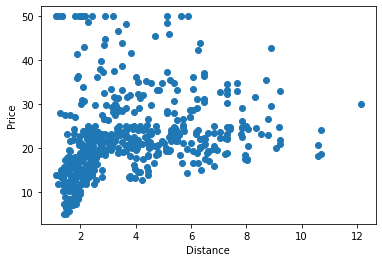

In [104]:
import seaborn as sns
plt.scatter(dataframe['DIS'],dataframe['price'])
plt.xlabel('Distance')
plt.ylabel('Price')


<AxesSubplot:xlabel='DIS', ylabel='price'>

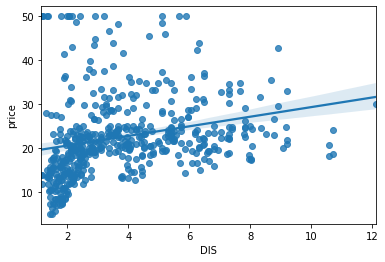

In [105]:
sns.regplot(x="DIS",y="price", data=dataframe)

<AxesSubplot:xlabel='ZN', ylabel='price'>

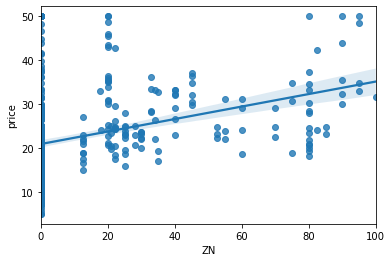

In [106]:
sns.regplot(x="ZN",y="price", data=dataframe)

<AxesSubplot:xlabel='INDUS', ylabel='price'>

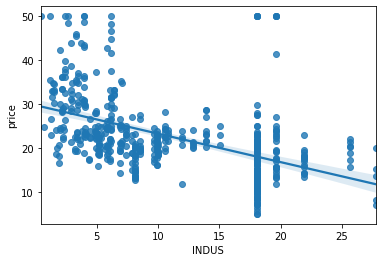

In [107]:
sns.regplot(x="INDUS",y="price", data=dataframe)

<AxesSubplot:xlabel='NOX', ylabel='price'>

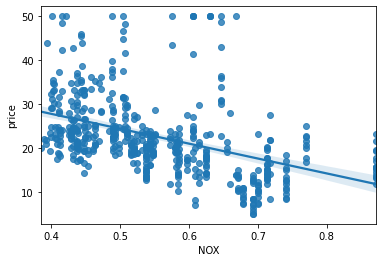

In [108]:
sns.regplot(x="NOX",y="price", data=dataframe)

<AxesSubplot:xlabel='LSTAT', ylabel='price'>

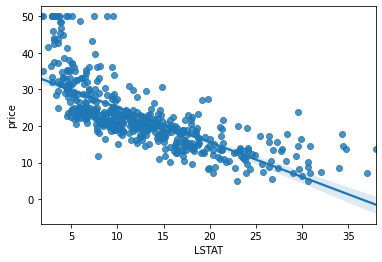

In [109]:
sns.regplot(x="LSTAT",y="price", data=dataframe)

In [110]:
#Saperating dependent and independent features
x = dataframe.drop('price', axis = 1)
y = dataframe.price

In [111]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [112]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [113]:
# Splitting the data into train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=45)

In [114]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
191,0.06911,45.0,3.44,0.0,0.437,6.739,30.8,6.4798,5.0,398.0,15.2,389.71,4.69
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
275,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
386,24.39380,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28
146,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71
380,88.97620,0.0,18.10,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
131,1.19294,0.0,21.89,0.0,0.624,6.326,97.7,2.2710,4.0,437.0,21.2,396.90,12.26
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98


In [115]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
48,0.25387,0.0,6.91,0.0,0.4480,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81
64,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05
473,4.64689,0.0,18.10,0.0,0.6140,6.980,67.6,2.5329,24.0,666.0,20.2,374.68,11.66
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
228,0.29819,0.0,6.20,0.0,0.5040,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.88125,0.0,21.89,0.0,0.6240,5.637,94.7,1.9799,4.0,437.0,21.2,396.90,18.34
345,0.03113,0.0,4.39,0.0,0.4420,6.014,48.5,8.0136,3.0,352.0,18.8,385.64,10.53
45,0.17142,0.0,6.91,0.0,0.4480,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
369,5.66998,0.0,18.10,1.0,0.6310,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73


In [116]:
# Standardize the data 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [117]:
x_train = scaler.fit_transform(x_train)

In [118]:
x_test = scaler.transform(x_test)

In [119]:
import pickle
pickle.dump(scaler, open('scaled.pk1', 'wb'))

In [120]:
x_train

array([[-0.3916557 ,  1.41126551, -1.13051448, ..., -1.48733012,
         0.34157525, -1.12129328],
       [-0.3955755 , -0.49952957, -1.31744925, ...,  0.15363339,
         0.39925669, -1.36938473],
       [-0.38878253,  1.19895494, -0.68988251, ..., -0.362098  ,
         0.42586987, -1.36371407],
       ...,
       [-0.27175391, -0.49952957,  1.60674468, ...,  1.32575018,
         0.42586987, -0.04812053],
       [ 4.48163725, -0.49952957,  1.04445675, ...,  0.85690346,
        -3.19246781,  3.45634847],
       [ 0.32658998, -0.49952957,  1.04445675, ...,  0.85690346,
         0.42586987,  0.29778984]])

In [121]:
#MTraining The Model
#initializing the linearRegression Model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [122]:
linear_reg.fit(x_train, y_train)

LinearRegression()

In [123]:
#Finding out coefficient and intercept
print(linear_reg.coef_)

[-1.04403403  1.05401899 -0.30446435  0.48167968 -1.91387665  2.54055249
  0.2062508  -3.1860519   2.9081093  -2.41218412 -1.98931455  0.76556975
 -3.54615085]


In [124]:
#Finding out coefficient and intercept
print(linear_reg.intercept_)

22.492090395480226


In [125]:
#Parameters on which model is trained
linear_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [126]:
#Prediction Model with test data
linear_reg_pred = linear_reg.predict(x_test)

In [127]:
linear_reg_pred

array([10.00376482, 23.43523897, 24.97427528, 21.49513418, 35.087565  ,
       14.4073179 , 19.53619664, 19.05985671, 27.75456432, 17.46204576,
       14.58406759, 20.1053761 , 36.24481005, 23.76497262, 16.33666771,
       20.04301995, 28.23656578, 11.3120847 , 15.83752045, 22.40804802,
       22.43870432, 14.02359736, 19.9263803 , 32.30256753, 22.55245086,
       27.59507183, 23.04764447,  7.5166162 , 26.13123837, 19.31598931,
       21.3574126 ,  8.47827666, 28.07099631, 24.93339977, 35.83055122,
       25.51079562, 39.48633873,  2.31693321, 31.49374242, 32.59170008,
       19.53631358, 21.99811248, 17.22889357, 31.08987315, 18.82675489,
       18.4344953 , 28.68498327, 28.22378217, 18.42883189, 22.09920102,
       42.71604042, 16.17923339, 27.80491805, 35.20872021, 16.35959907,
       31.2972707 ,  6.02955375, 13.53746555, 18.76542575, 19.79916844,
       14.26765114, 18.28220829, 36.95961088, 35.63832362, 17.984269  ,
       12.91788898, 38.7813029 , 36.25991168, 14.47124049, 19.57

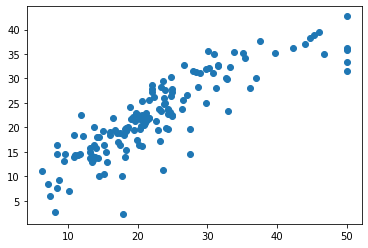

In [128]:
#Scattered plot for prediction
plt.scatter(y_test,linear_reg_pred)

In [129]:
#Calculating Residual
residuals = y_test - linear_reg_pred

In [130]:
residuals

48      4.396235
64      9.564761
473     4.825725
485    -0.295134
228    11.612435
         ...    
129     0.591428
345     1.093303
45     -2.827931
369    18.552851
427    -2.960777
Name: price, Length: 152, dtype: float64

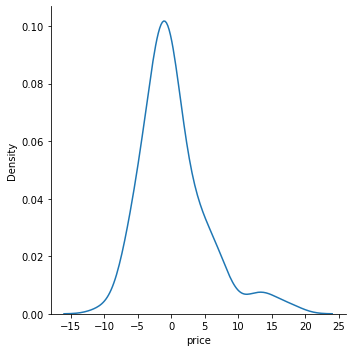

In [131]:
sns.displot(residuals,kind="kde")

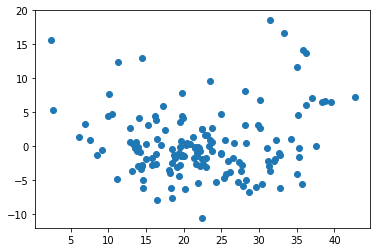

In [132]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(linear_reg_pred,residuals)

In [133]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,linear_reg_pred))
print(mean_squared_error(y_test,linear_reg_pred))
print(np.sqrt(mean_squared_error(y_test,linear_reg_pred)))

3.5312452092105473
24.46108451093937
4.945814848024476


In [135]:
#Calculation of R2
from sklearn.metrics import r2_score
score=r2_score(y_test,linear_reg_pred)
print(score)

0.7467438556481061


In [136]:
#calculation of adjusted R-square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7228863927743769

In [137]:
#Get new data for prediction
boston.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [155]:
#Apply transformation on the new data 
scaler.transform(boston.data[0].reshape(1,-1))

array([[-0.39835478,  0.26478846, -1.29816233, -0.26360274, -0.12858186,
         0.44008468, -0.09354216,  0.1373672 , -0.97117234, -0.66281794,
        -1.44044545,  0.42586987, -1.08018098]])

In [156]:
#Prediction on new data
linear_reg.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([30.15912681])

In [169]:
#Saving the model for deployment
import pickle
pickle.dump(linear_reg, open('regression_model.pkl','wb'))

In [170]:
pickled_model = pickle.load(open('regression_model.pkl','rb'))

In [172]:
## Prediction
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([30.15912681])

'E:\\DataScience\\Machine Learning Practical Assignments\\ML Assignments\\Linear Regression'